In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import seaborn
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import fiona
import shapely

from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

/Users/christianrosado/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
elevation_path = "Hack_Day_2016/Elevation_points/geo_export_7d2b03b2-bf4c-45d1-9b77-b2b149164bc4.shp"

In [3]:
elevation_shape = GeoDataFrame.from_file(elevation_path)

In [4]:
elevation_shape.head()

,elevation,feat_code,geometry,source_id,status,sub_code
0,129.740000,3020.0,POINT (-73.98256951739029 40.70191431011495),2.130200e+10,Unchanged,302000.0
1,120.586263,3000.0,POINT (-73.98777990215136 40.70192587201795),2.130000e+10,Unchanged,300020.0
2,114.740000,3020.0,POINT (-73.98443622855351 40.70193746867856),2.130200e+10,Unchanged,302000.0
3,69.130000,3020.0,POINT (-73.98103106115082 40.70194154237234),2.130200e+10,Unchanged,302000.0
4,49.235397,3020.0,POINT (-73.98802335685477 40.70196086988672),2.130200e+10,Unchanged,302000.0


In [33]:
elevation_shape.index

RangeIndex(start=0, stop=1473788, step=1)

In [5]:
elevation_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet

In [7]:
elevation_shape_sub = elevation_shape[:5]

In [8]:
elevation_shape_sub

,elevation,feat_code,geometry,source_id,status,sub_code
0,129.740000,3020.0,POINT (-73.98256951739029 40.70191431011495),2.130200e+10,Unchanged,302000.0
1,120.586263,3000.0,POINT (-73.98777990215136 40.70192587201795),2.130000e+10,Unchanged,300020.0
2,114.740000,3020.0,POINT (-73.98443622855351 40.70193746867856),2.130200e+10,Unchanged,302000.0
3,69.130000,3020.0,POINT (-73.98103106115082 40.70194154237234),2.130200e+10,Unchanged,302000.0
4,49.235397,3020.0,POINT (-73.98802335685477 40.70196086988672),2.130200e+10,Unchanged,302000.0


In [9]:
ct_path = "Hack_Day_2016/nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(ct_path)
ct_shape

In [34]:
ct_shape.crs = from_epsg(4326)

In [35]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [36]:
ct_shape['geometry'].size

38794

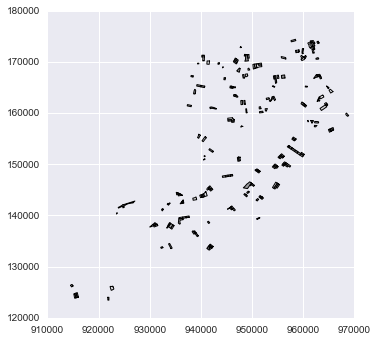

In [37]:
ct_shape.loc[:200].plot()

In [38]:
ct_shape['BoroName'].unique()

array([u'Staten Island', u'Manhattan', u'Brooklyn', u'Bronx', u'Queens'], dtype=object)

In [42]:
point = elevation_shape_sub.geometry[0]
point = shapely.geometry.Point(point.x, point.y) # longitude, latitude

In [43]:
print(point)

POINT (-73.98256951739029 40.70191431011495)


In [44]:
for ct in ct_shape.geometry:
    shape = shapely.geometry.asShape(ct)
    if shape.contains(point):
        print('yes')